# 04 — Baseline Forecasting Methods (Mean, Naïve, Seasonal Naïve, Drift)

These serve as benchmarks for any advanced model.


In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Synthetic monthly series
idx = pd.date_range("2016-01-01", periods=96, freq="MS")
rng = np.random.default_rng(0)
trend = np.linspace(80, 120, len(idx))
seasonal = 8*np.sin(2*np.pi*idx.month/12)
noise = rng.normal(0, 2.5, len(idx))
ts = pd.Series(trend + seasonal + noise, index=idx, name="y")

In [3]:
# Train/test split
train, test = ts[:-12], ts[-12:]
h = len(test)

In [4]:
# Mean forecast
mean_forecast = pd.Series(train.mean(), index=test.index)

In [5]:
# Naïve (last value)
naive_forecast = pd.Series(train.iloc[-1], index=test.index)

In [6]:
# Seasonal naïve (same month last year)
seasonal_naive = ts.shift(12).reindex(test.index)

In [7]:
# Drift (line from first to last)
drift_slope = (train.iloc[-1] - train.iloc[0]) / (len(train)-1)
drift_forecast = pd.Series([train.iloc[-1] + (i+1)*drift_slope for i in range(h)], index=test.index)

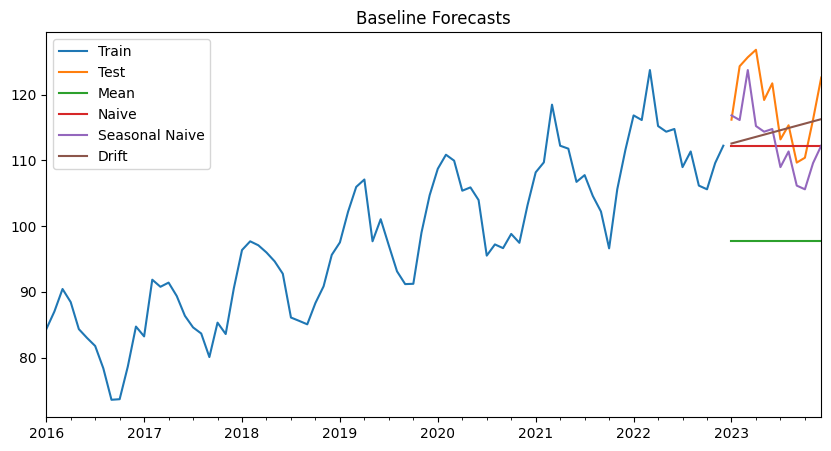

In [8]:
# Plot
plt.figure(figsize=(10,5))
train.plot(label="Train")
test.plot(label="Test")
mean_forecast.plot(label="Mean")
naive_forecast.plot(label="Naive")
seasonal_naive.plot(label="Seasonal Naive")
drift_forecast.plot(label="Drift")
plt.title("Baseline Forecasts")
plt.legend(); plt.show()


In [9]:
# Evaluate with RMSE & MAPE
def rmse(a,b):
    return np.sqrt(np.mean((a-b)**2))
def mape(a,b):
    return np.mean(np.abs((a-b)/a))*100

In [10]:
metrics = pd.DataFrame({
    "RMSE":[rmse(test, mean_forecast), rmse(test, naive_forecast), rmse(test, seasonal_naive), rmse(test, drift_forecast)],
    "MAPE":[mape(test, mean_forecast), mape(test, naive_forecast), mape(test, seasonal_naive), mape(test, drift_forecast)]
}, index=["Mean","Naive","SeasonalNaive","Drift"])

In [11]:
metrics

,RMSE,MAPE
Mean,21.462121,17.314248
Naive,8.348492,5.695105
SeasonalNaive,6.433848,4.702941
Drift,7.397003,4.997241


### 🔹 RMSE (Root Mean Squared Error)

* Lower = better fit to actual values.
* **Seasonal Naïve (6.43)** is the best, followed by **Drift (7.39)**, then **Naïve (8.35)**, and finally **Mean (21.46)** which is worst.

---

### 🔹 MAPE (Mean Absolute Percentage Error)

* Lower = better forecast accuracy.
* **Seasonal Naïve (4.70%)** again is best, with **Drift (4.99%)** and **Naïve (5.69%)** close behind.
* **Mean (17.31%)** performs poorly.

---

### 🔹 Insights

* **Seasonal Naïve** is strongest → makes sense, because your series has clear **seasonality** (monthly pattern).
* **Naïve** and **Drift** are also reasonably good because the series has **trend** and persistence.
* **Mean** forecast ignores trend & seasonality → so it fails badly.
